In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #imshow 사용시 커널 죽을때 사용

In [2]:
USE_CUDA=torch.cuda.is_available()
device=torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습함", device)

다음 기기로 학습함 cpu


In [3]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs=15
batch_size=100

In [5]:
mnist_train=dsets.FashionMNIST(root="FashionMNIST_data/", train=True, transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.FashionMNIST(root="FashionMNIST_data/", train=False, transform=transforms.ToTensor(),
                        download=True)

In [6]:
labels_map={
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

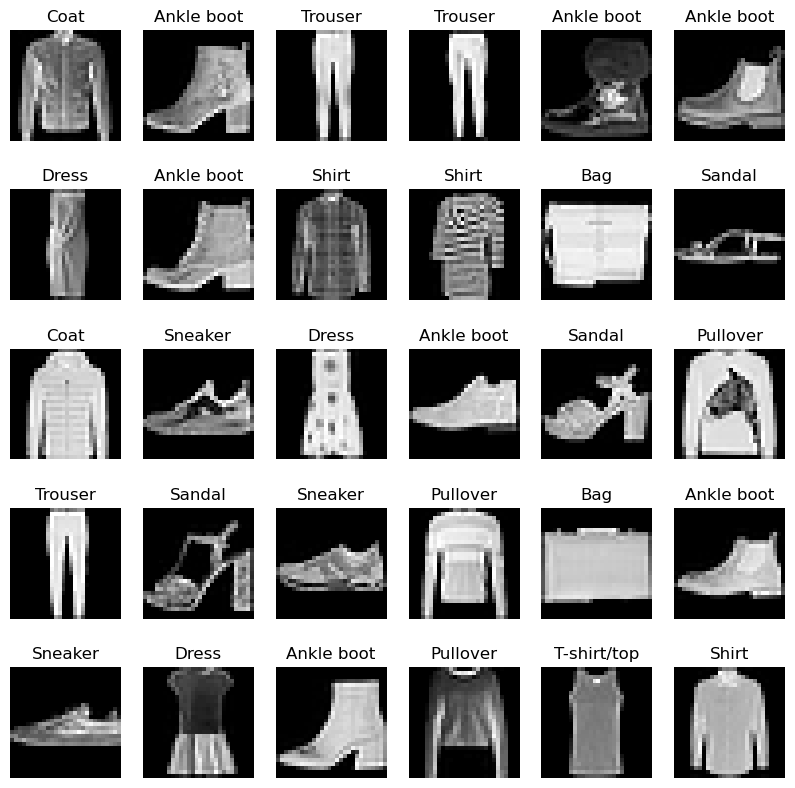

In [7]:
figure=plt.figure(figsize=(10, 10))
cols, rows= 6,5
for i in range(1, cols*rows+1):
    sample_idx=torch.randint(len(mnist_train), size=(1,)).item()
    img, label=mnist_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(torch.permute(img,(1,2,0)), cmap="gray") #차원순서 바꾸기
plt.show()    

In [8]:
data_loader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True, drop_last=True)

In [9]:
for X, Y in data_loader:
    x=X.view(-1, 28*28).to(device)
    print(x)
    # y=Y.to(device)
    # print(y)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ...

In [10]:
# MNIST data size(28 * 28=784)
linear=nn.Linear(784, 10, bias=True).to(device)

In [11]:
crit=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)

    for X, Y in data_loader:
        # 배치크기가 100, X(100, 784)
        X=X.view(-1, 28*28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=linear(X)

        cost=crit(y_hat, Y)

        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch

    print('Epoch: %d, cost=%.9f'%(epoch, avg_cost))
print("End")    

Epoch: 0, cost=0.660929561
Epoch: 1, cost=0.507753551
Epoch: 2, cost=0.476418555
Epoch: 3, cost=0.458851546
Epoch: 4, cost=0.450032473
Epoch: 5, cost=0.440698475
Epoch: 6, cost=0.436393023
Epoch: 7, cost=0.430243492
Epoch: 8, cost=0.426185817
Epoch: 9, cost=0.421951056
Epoch: 10, cost=0.419609368
Epoch: 11, cost=0.416472673
Epoch: 12, cost=0.414248466
Epoch: 13, cost=0.412323564
Epoch: 14, cost=0.410539448
End


In [13]:
X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction, 1)== Y_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.7685999870300293


c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


3757
Lable : tensor([8])
prediction: 8


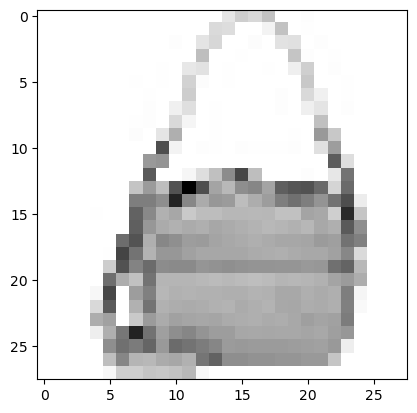

In [14]:
r=random.randint(0, len(mnist_test)-1)
print(r)
X_single_data=mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print("Lable :", Y_single_data)
single_prediction=linear(X_single_data)
print("prediction:", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
plt.show()